0.242
Skipping 20000 iterations...

Finding 1001 peaks.

Peaks found:

1
101
201
301
401
501
601
701
801
901
1001


Text(0, 0.5, '$X_{N+1}$')

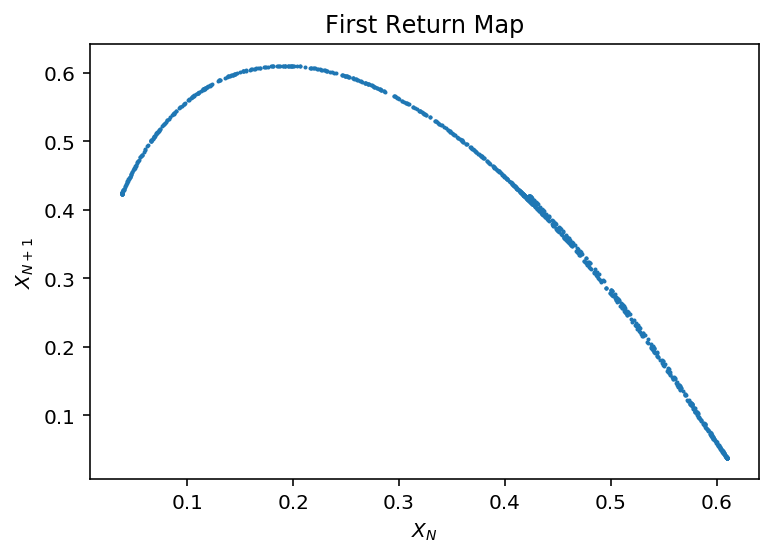

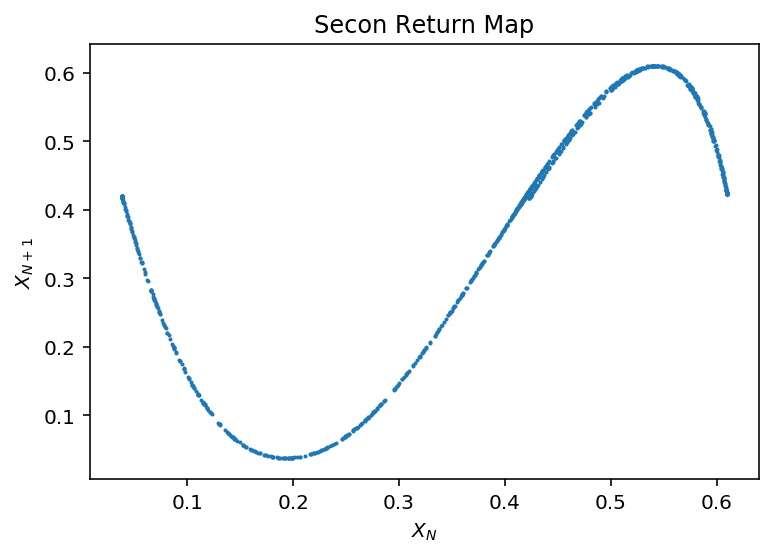

In [1]:
#ReturnMap-Example.py

from RK4 import * # the file "RK4.py" must be in the same directory
from pylab import *  

## Intitial Values
Rv = 80.00        # variable resistance that we choose for potentiometers
R0 = 157.86       # theory value os 157kOhms
Voff = 0.786 #328
V0_off = 1.028 #47
V0 = (V0_off - Voff) *1
print(V0_off - Voff)

## Resistances
Ra = 46.90 #kOhms
Rb = 46.93 #kOhms
Rc = 46.61 #kOhms
Rd = 46.60 #kOhms
Re = 46.62 #kOhms
Rf = 46.70 #kOhms


## Capacitances
Ca = .993 #uF
Cb = .991 #uF
Cc = .989 #uF

## Ideal Case:
#Ravg = (Ra + Rb + Rc + Rd + Re + Rf)/6.0
#Ra = Rb = Rc = Rd = Re = Rf = Ravg
#Cavg = (Ca + Cb + Cc)/3.0
#Ca = Cb = Cc = Cavg

R1 = 217.00 #ohms
R2= 1174.0 #ohms
Rr = R2/R1

## Ratios of R's and RC's
RC_ab = (Rb*Cb)/(Ra*Ca)
R_de = Rd/Re
R_df = Rd/Rf
R_c0 = Rc/R0
RC_abc =((Ra*Ca)**2)/(Rb*Cb*Rc*Cc)


def D(y):
   if y > 0:
      return 0.0
   else:
      return -Rr*y  # experimental R2 and R1 lead to a value of 6.143077715

## resistances in kOhms
        # input voltage
A = Rc/Rv          # 0.642163661581,  if R is 46.79 and Rv is 51.1, then A is 0.9156555773
alpha = (Rc/R0)*V0

def deriv(x):
#   A = 0.642163661581
#   alpha = 0.0737261146497
   return array([x[1], x[2], (-A*RC_ab*x[2] - R_de*x[1] + R_df*D(x[0]) - alpha)*RC_abc])
#############################################################################


x = array([1.46939776, -0.80403, -0.24199481])  # Initial conditions (close to attractor)

nd = 20000 # number of iterations to skip
np = 1000 # number of points in the 1st return map (one less in 2nd return map)
dt = 0.001

j = 0 # component of the array x to make a return map for (can be 0, 1, or 2)

print('Skipping %i iterations...\n' % nd)
for i in arange(nd):  # don't use the result until time has advanced a bit
   x = RK4(deriv,x,dt)

print('Finding %i peaks.\n'% (np + 1))
print('Peaks found:\n' )
pklist = zeros(np + 1)
old = x[j]
x = RK4(deriv,x,dt)
if (x[j] > old):
   increasing = True
else:
   increasing = False
i = 0
while (i < (np+1)):
   old = x[j]
   x = RK4(deriv,x,dt)
   if (x[j] < old):
      if increasing:
         pklist[i] = x[j]
         if(i%100 ==0):
                print(i+1)
         i += 1
         increasing = False
   else:
      increasing = True

"""        
# Make to equal length lists of peaks shifted by 1
r1list = zeros((np-1,2))
for i in arange(np-1):
   r1list[i,0] = pklist[i]
   r1list[i,1] = pklist[i+1]

# Make to equal length lists of peaks shifted by 2
r2list = zeros((np-2,2))
for i in arange(np-2):
   r2list[i,0] = pklist[i]
   r2list[i,1] = pklist[i+2]



figure()
title('First Return Map')
scatter(r1list[:,0], r1list[:,1], s=1)
xlabel(r'$X_N$')
ylabel(r'$X_{N+1}$')


figure()
title('Second Return Map')
scatter(r2list[:,0], r2list[:,1], s=1)
xlabel(r'$X_N$')
ylabel(r'$X_{N+2}$')

show()
"""

figure()
title('First Return Map')
scatter(pklist[0:len(pklist)-1], pklist[1:], s=1)
xlabel(r'$X_N$')
ylabel(r'$X_{N+1}$')

figure()
title('Secon Return Map')
scatter(pklist[0:len(pklist)-2], pklist[2:], s=1)
xlabel(r'$X_N$')
ylabel(r'$X_{N+1}$')




In [2]:
# Find the maxima of a series using the algorithm of extrema.exe from
# the TISEAN Nonlinear Time Series Analysis package.  Note that the time
# is in steps between points in the series, not actual time.
 
from numpy import *
from pylab import *


 
series = loadtxt('Chaotic_data_80kOhms.txt',unpack=True, usecols=[0]) # pick the column
series -= 0.786328 #correct for offset ground

mintime = 37  # can set the minimum number of steps between maxima used

maxs = []
 
lasttime = 0.0
x = zeros(3)
x[0] = series[0]
x[1] = series[1]
for i in arange(2,len(series)):
    x[2] = series[i];
    if ((x[1] >= x[0]) and (x[1] > x[2])):
        a = x[1]
        b = (x[2]-x[0])/2.0
        c = (x[2]-2.0*x[1]+x[0])/2.0
        time= -b/2.0/c
        nexttime = i-1.0+time
        if ((nexttime-lasttime) >= mintime):
            xmax = a + b*time + c*time**2
            maxs.append(xmax)
            #print(xmax)
            lasttime = nexttime
    x[0] = x[1]
    x[1] = x[2]
    
#print(maxs)

figure()
ax = gca()


for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('normal')


ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)


title('First Return Map', fontsize = 16)
#scatter(maxs[:,0], maxs[:,1], s=1)
scatter(maxs[0:len(maxs)-1], maxs[1:],marker='.',s=1, color = 'red', label = 'data')
scatter(pklist[0:len(pklist)-1], pklist[1:], s=1, color = 'black', label = 'theory')
xlim(0)
ylim(0)
xlabel(r'$X_N$', fontsize = 16)
ylabel(r'$X_{N+1}$', fontsize = 16)
lgnd = legend()
lgnd.legendHandles[0]._sizes = [120]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig('FirstReturnMap3.png', bbox_inches = 'tight', dpi=1000)



figure()
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
    tick.label1.set_fontweight('normal')


ax.spines['top'].set_linewidth(3.5)
ax.spines['right'].set_linewidth(3.5)
ax.spines['bottom'].set_linewidth(3.5)
ax.spines['left'].set_linewidth(3.5)


title('Second Return Map', fontsize = 16)
#scatter(maxs[:,0], maxs[:,1], s=1)
scatter(maxs[0:len(maxs)-2], maxs[2:],marker='.',s=1, c = 'red', label = 'data')
scatter(pklist[0:len(pklist)-2], pklist[2:], s=1, c= 'black', label = 'theory')
lgnd = legend()
lgnd.legendHandles[0]._sizes = [120]
lgnd.legendHandles[1]._sizes = [30]
xlim(0)
ylim(0)
xlabel(r'$X_N$', fontsize = 16)
ylabel(r'$X_{N+2}$', fontsize = 16)
plt.savefig('SecondReturnMap3.png', bbox_inches = 'tight', dpi=1000)





<Figure size 432x288 with 0 Axes>

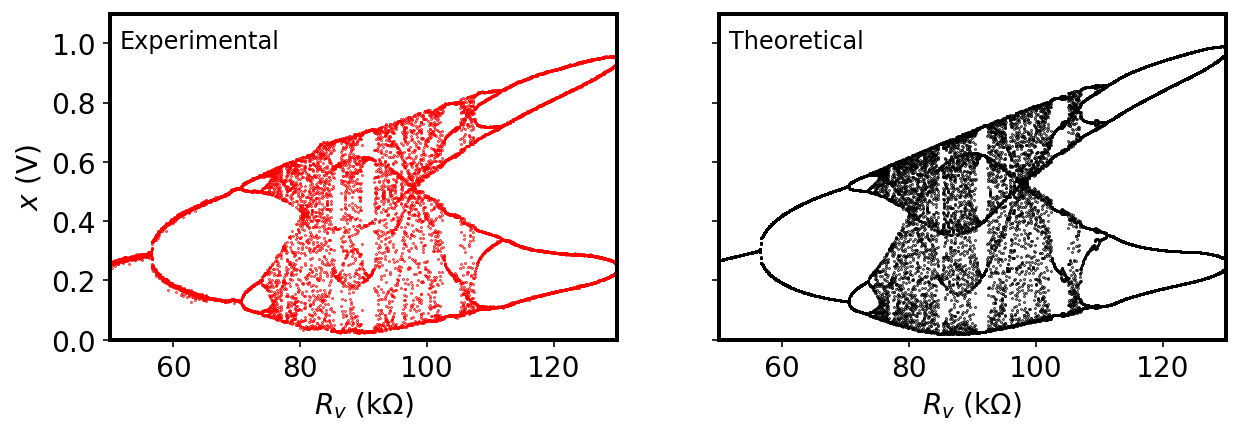

In [1]:
from pylab import *  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


R_data, max_data = loadtxt('Exp4_Bifurcation.txt', unpack=True)
R_theory, max_theory = loadtxt('Theoretical_Bifurcation_Overnight.txt', unpack=True)


figure()
plt.figure(figsize=(10,3))


## SUBPLOT FOR EXPERIMENTAL
plt.subplot(1,2,1);
scatter(R_data, max_data, marker = '.', s = .5, c ='r')


ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('normal')

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ylim(-0,1.1)
xlim(50, 130)
figtext(0.132,0.80, 'Experimental', fontsize = 12)
plt.xticks(np.arange(60, 130, 20))
xlabel("$R_v$ (kΩ)", fontsize = 14)
ylabel("$x$ (V)", fontsize =14)
#plt.savefig('exp_Bif_', dpi=1000)



## SUBPLOT FOR THEORETICAL
plt.subplot(1,2,2);
scatter(R_theory, max_theory, marker = '.', s = .5, c ='k', label = 'theory')

ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('normal')


ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ylim(0,1.1)
xlim(50, 130)
figtext(.555,0.8, 'Theoretical', fontsize = 12)
plt.xticks(np.arange(60, 130, 20))
xlabel("$R_v$ (kΩ)", fontsize = 14)
gca().set_yticklabels([''])
#ylabel("$x$ (V)", fontsize =14)

plt.savefig('multiplot_bif.png',bbox_inches = "tight", dpi=1000)



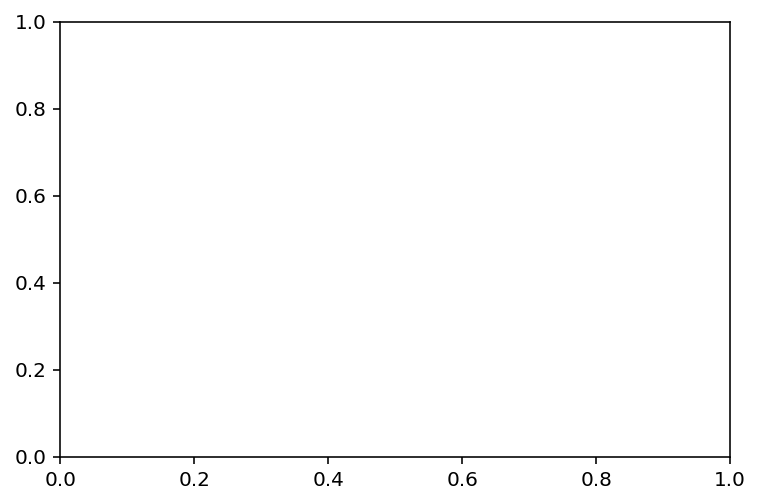

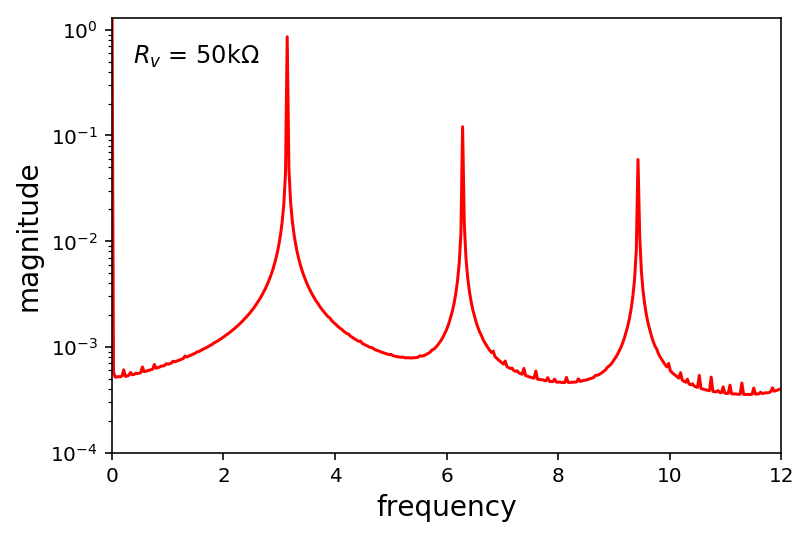

In [12]:
from pylab import *  
import matplotlib.pyplot as plt
import numpy as np

f,mag = loadtxt('R50V.txt',unpack=True) # pick the column

figure()

#title('Power Spectral Density: 80kΩ')



plot(f,mag, color = 'red')
semilogy()
figtext(0.15,0.8, '$R_v$ = 50kΩ', fontsize = 12)
xlim(0,12)
ylim(.0001, 1.3)
xlabel('frequency', fontsize = 14)
ylabel('magnitude', fontsize = 14)
#plt.savefig('PSD-Avg-50kOhms.png', dpi=1000)
show()

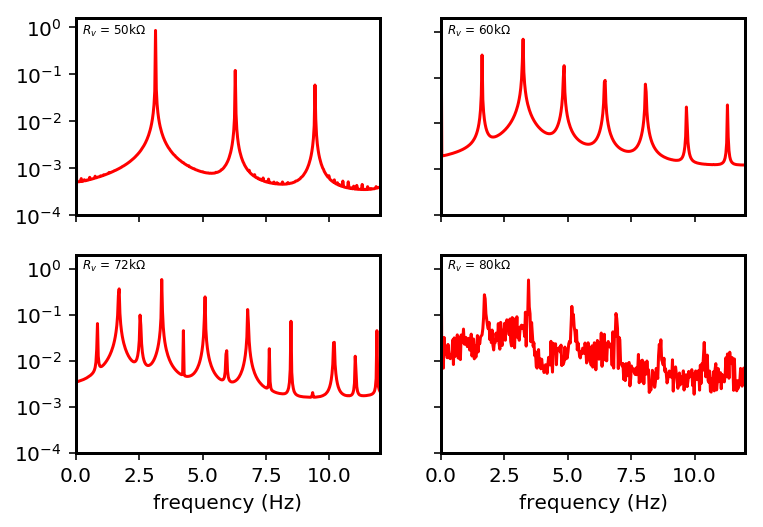

In [7]:
from pylab import *  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# Data
f50,mag50 = loadtxt('R50V.txt',unpack=True) # pick the column
f60,mag60 = loadtxt('R60V.txt',unpack=True) # pick the column
f72,mag72 = loadtxt('R72V.txt',unpack=True) # pick the column
f80,mag80 = loadtxt('R80V.txt',unpack=True) # pick the column


# Plots

figure()

# Subplot for 50kOhms
plt.subplot(2,2,1);

ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='y', which='minor', left=False)

p1 = plot(f50, mag50, color = 'red')
ax = gca()

semilogy()
gca().set_xticklabels([''])
xlim(0,12)
ylim(.0001, 1.6)
figtext(0.132,0.85, '$R_v$ = 50kΩ', fontsize = 6)



# Subplot for 60kOhms
subplot(2,2,2);
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='y', which='minor', left=False)

p2 = plot(f60, mag60, color = 'red')
semilogy()
gca().set_xticklabels([''])
gca().set_yticklabels([''])
xlim(0,12)
ylim(.0001, 2)
figtext(.555,0.85, '$R_v$ = 60kΩ', fontsize = 6)


# Subplot for 72kOhms
subplot(2,2,3);
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='y', which='minor', left=False)

p3 = plot(f72, mag72, color = 'red')
semilogy()
xlim(0,12)
ylim(.0001, 2)
xlabel('frequency (Hz)', fontsize = 10)
figtext(.132,0.442, '$R_v$ = 72kΩ', fontsize = 6)


# Subplot for 80kOhms
subplot(2,2,4);
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
    tick.label1.set_fontweight('normal')

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='y', which='minor', left=False)

p4 = plot(f80, mag80, color = 'red')
semilogy()
gca().set_yticklabels([''])
xlim(0,12)
ylim(.0001, 2)
xlabel('frequency (Hz)', fontsize = 10)
figtext(.555,0.442, '$R_v$ = 80kΩ', fontsize = 6)


plt.savefig('subplot_test.png', dpi=1000)







